# Homework 2: Daxi Cheng, Jushira Thelakkat, Shirley Zhu

In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline
df = pd.read_csv("NYC_Restaurants.csv", dtype=unicode, encoding='utf-8')

Populating the interactive namespace from numpy and matplotlib


**Q1. Create a unique name for each restaurant.**

- Create a new column 'RESTAURANT' by combining the fields 'DBA', 'BUILDING', 'STREET', and 'ZIPCODE'

In [2]:
df['RESTAURANT'] = df['DBA'] + ' ' + df['BUILDING'] + ' ' + df['STREET'] + ' ' + df['ZIPCODE']
df['RESTAURANT'][:10]

0                    WENDY'S 469 FLATBUSH AVENUE 11225
1                    WENDY'S 469 FLATBUSH AVENUE 11225
2                    WENDY'S 469 FLATBUSH AVENUE 11225
3                    WENDY'S 469 FLATBUSH AVENUE 11225
4                    WENDY'S 469 FLATBUSH AVENUE 11225
5               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
6               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
7               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
8               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

**Q2. How many restaurants are included in the data?**

- Remove duplicates in the 'RESTAURANT' field and count the number of rows

In [18]:
restaurant_dedup = df.drop_duplicates(subset='RESTAURANT')
#print "Overall Count:", df['RESTAURANT'].count()
print "Unique Restaurant Count:", restaurant_dedup['RESTAURANT'].count()

Unique Restaurant Count: 10114


**Q3. How many chains are there?**

- Filter for DBA and RESTAURANT, drop duplicate rows
- Extract the DBA when there are more than 2 unique locations

In [27]:
restaurant_dba = df[['RESTAURANT', 'DBA']]
restaurant_dba_dedup = restaurant_dba.drop_duplicates(subset='RESTAURANT')
chain_mask = restaurant_dba_dedup['DBA'].value_counts() > 1
chains = restaurant_dba_dedup['DBA'].value_counts()[chain_mask]
num_chains = len(chains)
print "There are", num_chains, "chains."

There are 368 chains.


**Q4. Plot a bar graph of the top 20 most popular chains.**

- Plot top 20 rows with a bar graph

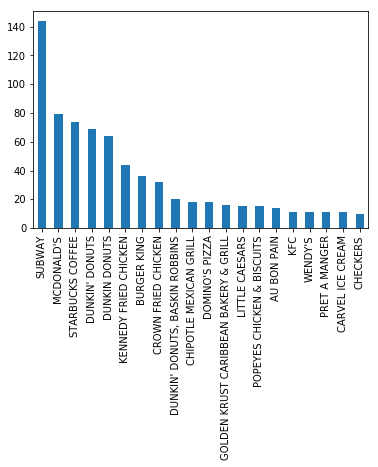

In [28]:
chains[:20].plot(kind='bar')

**Q5. What fraction of all restaurants are chains?**

- Divide the number of chains by the total number of unique restaurants.

In [29]:
num_restaurant = restaurant_dedup['RESTAURANT'].count()
total_chains = chains.sum()
fraction = float(total_chains)/num_restaurant
print fraction

0.164722167293


**Q6. Plot the number of non-chain restaurants in each boro.**

- Replace 'Missing' values with np.nan so that they don't count
- Create a new dataframe restaurant_boro and drop duplicate rows
- Set a mask for restaurants with only one location
- Apply the mask to the dataframe and count the number of restaurants per borough
- Plot with a bar graph

/Users/shirley/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


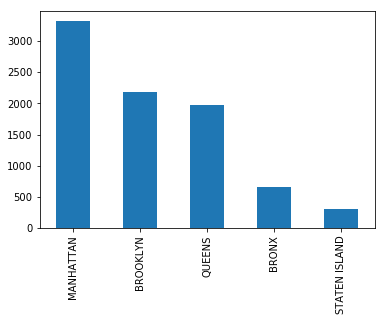

In [7]:
boro_mask = df['BORO'] == 'Missing'
df.loc[boro_mask, 'BORO'] = np.nan

restaurant_boro = df[['DBA', 'BORO', 'RESTAURANT']].drop_duplicates()
restaurant_boro.index = restaurant_boro['DBA']

nonchain_mask = restaurant_dba_dedup['DBA'].value_counts() == 1
nonchains = restaurant_boro[nonchain_mask]['BORO'].value_counts()
nonchains.plot(kind='bar')

**Q7. Plot the fraction of non-chain restaurants in each boro.**

- Count the number of total restaurants per borough
- Divide the number of non-chain restaurants per borough by the total number of restaurants per borough
- Plot with a bar graph

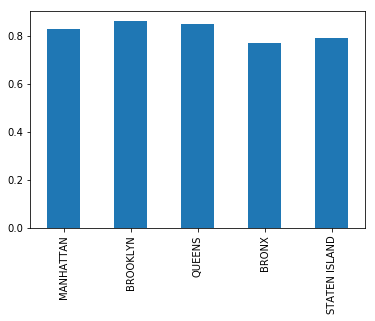

In [8]:
numres_boro = restaurant_boro['BORO'].value_counts()
nonchain_fraction = nonchains / numres_boro

nonchain_fraction.plot(kind='bar')

**Q8. Plot the popularity of cuisines.**

- Use 'CUISINE DESCRIPTION' and 'RESTAURANT' and drop duplicate rows
- Get the value count of each cuisine type using unique restaurants
- Plot using a bar graph

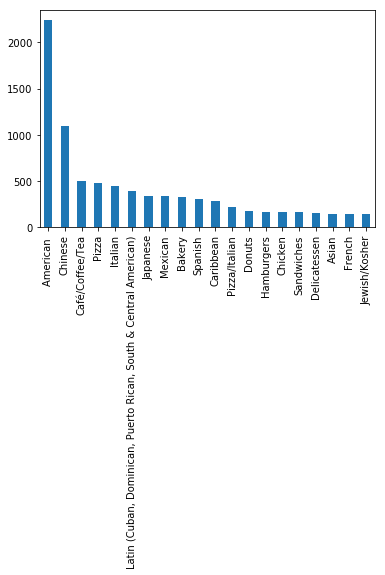

In [9]:
cuisine_restaurant = df[['CUISINE DESCRIPTION', 'RESTAURANT']].drop_duplicates()
vc_cuisine = cuisine_restaurant['CUISINE DESCRIPTION'].value_counts()
vc_cuisine[:20].plot(kind='bar')

**Q9. Plot the cuisines among restaurants which never got cited for violations.**

- Create a new dataframe with 'RESTAURANT', 'VIOLATION CODE', 'CUISINE DESCRIPTION'
- Create two dataframes: where Violation Code is null, where Violation Code is not null
- Remove duplicates and compare the two lists using a mask
- Those that are only in the null list have not had any violations
- Pull out the Cuisine Description for each of these restaurants and plot the top 20 cleanest cuisine types

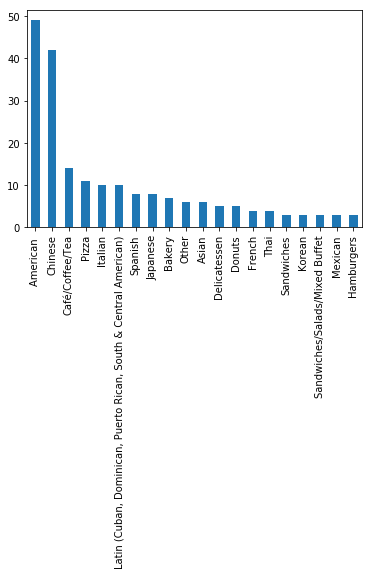

In [31]:
violation_restaurant_df = df[['RESTAURANT', 'VIOLATION CODE', 'CUISINE DESCRIPTION']]

violations_null_mask = violation_restaurant_df['VIOLATION CODE'].isnull()
null_restaurants = violation_restaurant_df[violations_null_mask]

violations_not_mask = violation_restaurant_df['VIOLATION CODE'].notnull()
not_restaurants = violation_restaurant_df[violations_not_mask]

null_restaurants = null_restaurants.drop_duplicates(subset='RESTAURANT')
not_restaurants = not_restaurants.drop_duplicates(subset='RESTAURANT')

clean_mask = ~null_restaurants['RESTAURANT'].isin(not_restaurants['RESTAURANT'])

clean_restaurants = null_restaurants[clean_mask]
vc_clean = clean_restaurants['CUISINE DESCRIPTION'].value_counts()
vc_clean[:20].plot(kind='bar')

**Q10. What cuisines tend to be the “cleanest”?**

- Set a mask for cuisine types with more than 20 restaurants
- Divide the number of clean cuisine types by the total number of cuisine types
- Print the ratios of the top 10 cleanest cuisine types

In [32]:
atleast_20_mask = cuisine_restaurant['CUISINE DESCRIPTION'].value_counts() >= 20
clean_restaurants.index = clean_restaurants['CUISINE DESCRIPTION']
vc_clean_cuisine = clean_restaurants[atleast_20_mask]['CUISINE DESCRIPTION'].value_counts()
clean_ratio = vc_clean_cuisine*1.0 / vc_cuisine[atleast_20_mask]
print clean_ratio.sort_values(ascending=False)[:10].dropna()

Soul Food                        0.090909
Vietnamese/Cambodian/Malaysia    0.062500
Other                            0.058252
Soups & Sandwiches               0.047619
Continental                      0.047619
Barbecue                         0.047619
Asian                            0.041096
Chinese                          0.038251
Greek                            0.036364
Peruvian                         0.035714
Name: CUISINE DESCRIPTION, dtype: float64


/Users/shirley/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


**Q11. What are the most common violations in each borough?**

- Create a dataframe of boroughs and violations, dropping any missing values for boroughs
- Create a crosstab of the two columns, transpose such that BORO is the row, and extract the most common violation

In [12]:
boro_violation_df = df[['BORO', 'VIOLATION DESCRIPTION']].dropna(axis=0)
boro_violation_df.index = boro_violation_df['BORO']
boro_violation = pd.crosstab(boro_violation_df['BORO'], boro_violation_df['VIOLATION DESCRIPTION'])
boro_violation_top = boro_violation.T.idxmax()
print boro_violation_top

BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object


/Users/shirley/anaconda/lib/python2.7/site-packages/pandas/core/reshape/pivot.py:135: FutureWarning: 'BORO' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


**Q12. What are the most common violations per borough, after normalizing for the relative abundance of each violation?**

- Find violationFrequency, which is the total count of all violations
- Divide counts from previous table by violationFrequency to normalize data
- Transpose such that BORO is the row and print

In [13]:
violationFrequency = boro_violation_df['VIOLATION DESCRIPTION'].value_counts()
normalize_table = boro_violation / violationFrequency
normalize_table_top = normalize_table.T.idxmax()
print normalize_table_top

BORO
BRONX                                  Unprotected food re-served.
BROOKLYN         Precooked potentially hazardous food from comm...
MANHATTAN        Out-of package sale of tobacco products observed.
QUEENS           Caloric content range (minimum to maximum) not...
STATEN ISLAND    Eggs found dirty/cracked; liquid, frozen or po...
dtype: object


**Q13. How many phone area codes correspond to a single zipcode?**

- Create a dataframe with 'PHONE' and 'ZIPCODE'
- Define a function to return the area code of a phone number
- Using 'ZIPCODE' and 'AREA CODE', drop duplicate rows
- Create a crosstab for 'ZIPCODE' and 'AREA CODE'
- Extract number of rows where Area Code to ZipCode is 1:1

In [14]:
phone_zipcode = df[['PHONE', 'ZIPCODE']]

def getAreaCode(s):
    return str(s)[:3]

phone_zipcode['AREA CODE'] = phone_zipcode['PHONE'].apply(getAreaCode)
phone_zipcode = phone_zipcode[['ZIPCODE', 'AREA CODE']].drop_duplicates()
phone_zipcode_ct = pd.crosstab(phone_zipcode['ZIPCODE'], phone_zipcode['AREA CODE'], margins=True).T
areacode_mask = phone_zipcode_ct['All']==1
len(phone_zipcode_ct[areacode_mask].index)

/Users/shirley/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


34

**Q14. Find common misspellings of street names**

- Define functions to grab the 'STREET TYPE' and 'STREET BASE'
- Add the columns for 'STREET TYPE', 'STREET BASE', and 'STREET BASE & ZIP'
- Drop the duplicate rows and set a mask for missing 'STREET BASE' values
- Merge the dataframe on itself on 'STREET BASE & ZIP' to get misspelling for the same street bases
- Create a crosstab for the two different 'STREET TYPE' values
- Extract the "idxmax" or max value/most commonly spelled street types for the given misspellings

In [15]:
def getStreetType(s):
    words = s.split()
    return words[-1]

def getStreetBase(s):
    words = s.split()
    s = s.replace(words[-1],'')
    return s

df['STREET TYPE'] = df['STREET'].apply(getStreetType)
df['STREET BASE'] = df['STREET'].apply(getStreetBase)
df['STREET BASE & ZIP'] = df['STREET BASE'] + ' ' + df['ZIPCODE']

street_zip_df = df[['STREET TYPE', 'STREET BASE', 'STREET BASE & ZIP']]
street_zip_df = street_zip_df.drop_duplicates()
na_mask = street_zip_df['STREET BASE'] == ''
street_zip_df = street_zip_df[~na_mask]

street_zip_df = pd.merge(street_zip_df, street_zip_df, on='STREET BASE & ZIP')

samestreet_mask = street_zip_df['STREET TYPE_x'] != street_zip_df['STREET TYPE_y']
diff_street_type = street_zip_df[samestreet_mask]

street_types = pd.crosstab(diff_street_type['STREET TYPE_x'], diff_street_type['STREET TYPE_y'])

misspellings = street_types[['AVE', 'ST', 'RD', 'PL', 'BOULEARD', 'BULEVARD']].idxmax()
print misspellings

STREET TYPE_y
AVE         AVENUE
ST          STREET
RD            ROAD
PL           PLACE
BOULEARD      BLVD
BULEVARD      BLVD
dtype: object
